[Reference](https://blog.devgenius.io/ma-arma-and-arima-models-in-time-series-forecasting-40ad5152a6b9)

# Simple Moving Average (SMA)

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30"
response = requests.get(url)
data = response.json()
data

{'prices': [[1691056873318, 29115.370727426594],
  [1691060473675, 29156.419326711177],
  [1691064007809, 29107.671411490628],
  [1691067624376, 29068.72166655228],
  [1691071270999, 29166.28864445906],
  [1691074859077, 29362.22553327804],
  [1691078502847, 29232.176838879168],
  [1691082067868, 29287.205910225486],
  [1691085676622, 29215.037695810468],
  [1691089266073, 29245.262235366434],
  [1691092807402, 29258.097801696906],
  [1691096433185, 29289.158250324508],
  [1691100078088, 29228.811308779783],
  [1691103672788, 29220.722581707367],
  [1691107270777, 29172.607611740656],
  [1691110848014, 29185.574650803876],
  [1691114489987, 29181.163835515374],
  [1691118079101, 29158.337399031203],
  [1691121662097, 29137.03146339251],
  [1691125265250, 29146.82862350783],
  [1691128862977, 29218.412777883786],
  [1691132490979, 29162.440886609107],
  [1691136057110, 29162.872558628256],
  [1691139629991, 29155.971784390895],
  [1691143222366, 29170.958722116637],
  [1691146841119, 29

In [2]:
prices = [x[1] for x in data['prices']]
timestamps = [x[0] for x in data['prices']]
df = pd.DataFrame({'Price': prices}, index=pd.to_datetime(timestamps, unit='ms'))
df

,Price
2023-08-03 10:01:13.318,29115.370727
2023-08-03 11:01:13.675,29156.419327
2023-08-03 12:00:07.809,29107.671411
2023-08-03 13:00:24.376,29068.721667
2023-08-03 14:01:10.999,29166.288644
...,...
2023-09-02 06:00:40.052,25786.469766
2023-09-02 07:01:00.948,25798.397606
2023-09-02 08:00:39.497,25796.141797
2023-09-02 09:00:52.546,25773.887394


In [3]:
df['SMA'] = df['Price'].rolling(window=5).mean()

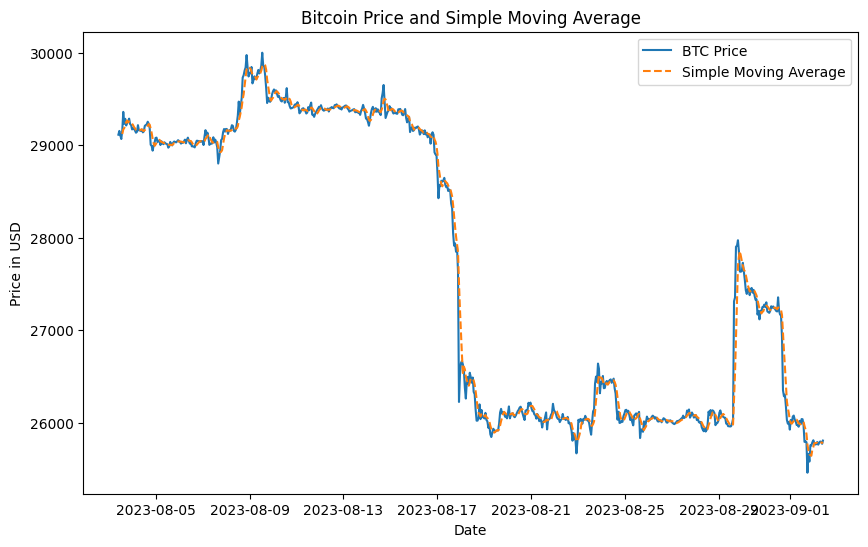

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df['Price'], label='BTC Price')
plt.plot(df['SMA'], label='Simple Moving Average', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price and Simple Moving Average')
plt.show()

# Exponential Moving Average (EMA)

In [5]:
df['EMA'] = df['Price'].ewm(alpha=0.001, adjust=False).mean()

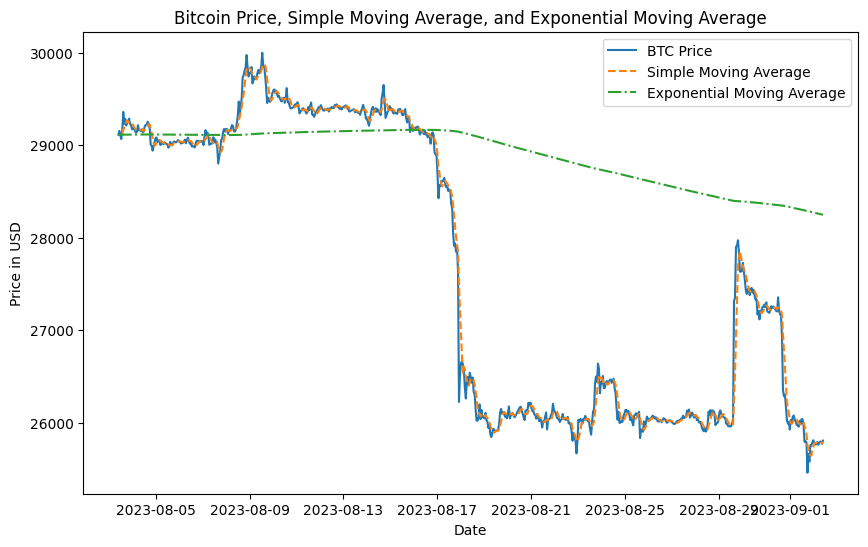

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df['Price'], label='BTC Price')
plt.plot(df['SMA'], label='Simple Moving Average', linestyle='--')
plt.plot(df['EMA'], label='Exponential Moving Average', linestyle='-.')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price, Simple Moving Average, and Exponential Moving Average')
plt.show()

# Moving Average Model

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(42)

# AR part: 1 - 0.5 * z - 0.25 * z^2
# MA part: 1 + 0.5 * z + 0.25 * z^2
ar = np.array([1, -0.5, -0.25])
ma = np.array([1, 0.5, 0.25])

arma_process = ArmaProcess(ar, ma)
simulated_data = arma_process.generate_sample(nsample=1000)
simulated_series = pd.Series(simulated_data)

In [8]:
arima_model = ARIMA(simulated_series, order=(2, 0, 2))
fit_arima_model = arima_model.fit()

# Forecast the next 10 observations
arima_forecast = fit_arima_model.get_forecast(steps=10)
arima_forecast_index = pd.RangeIndex(start=len(simulated_series), stop=len(simulated_series) + 10)
arima_forecast_series = pd.Series(arima_forecast.predicted_mean.values, index=arima_forecast_index)
print(arima_forecast_series)

1000    0.381838
1001    0.447337
1002    0.372533
1003    0.324770
1004    0.285872
1005    0.255143
1006    0.230782
1007    0.211478
1008    0.196181
1009    0.184058
dtype: float64
